In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
sns.set()
plt.rcParams['font.sans-serif'] = ['simhei']
plt.rcParams['axes.unicode_minus'] = False

# 1.讀入crime type資料

In [2]:
df1 = pd.read_csv("data/crimeType.csv")

## 資料檔案結構分析

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631199 entries, 0 to 631198
Data columns (total 2 columns):
crime_ID        631199 non-null object
crime_type03    631199 non-null int64
dtypes: int64(1), object(1)
memory usage: 9.6+ MB


In [4]:
df1.head(3)

,crime_ID,crime_type03
0,FFFFFFFFBA677FC9,13
1,FFFFFFFFD8DB4141,13
2,FFFFFFFFDB51030D,14


In [5]:
df1.shape

(631199, 2)

### crime type 資料包含二個欄位，crime_ID及crime_type03，crime_ID 表示犯罪事件編碼及crime_type03表示犯罪類型，共計631199筆資料。

## 犯罪類型編碼

In [6]:
typeTBL={1:"性侵害",2:"故意殺人",3:"強盜",4:"組織犯罪",5:"搶奪",6:"人口販運",7:"洗錢",8:"詐欺",9:"汽車竊盜",10:"機車竊盜",11:"竊盜",13:"毒品施用",14:"其他毒品犯罪行為"}
typeTBLdf = pd.DataFrame.from_dict(typeTBL, orient='index')
typeTBLdf

,0
1,性侵害
2,故意殺人
3,強盜
4,組織犯罪
5,搶奪
6,人口販運
7,洗錢
8,詐欺
9,汽車竊盜
10,機車竊盜


## 統計每項犯罪類型的犯罪記錄數

In [7]:
tt = df1.groupby('crime_type03') #依據crime_type03欄位分類
tc = tt.count() #統計每一種犯罪的次數
tcc=pd.merge(typeTBLdf, tc, right_index=True, left_index=True) 
#data merge ref from https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/
tcc

,0,crime_ID
1,性侵害,7935
2,故意殺人,7653
3,強盜,6186
5,搶奪,4695
8,詐欺,183975
9,汽車竊盜,20765
10,機車竊盜,35633
11,竊盜,38846
13,毒品施用,211895
14,其他毒品犯罪行為,113616


In [60]:
tcc.columns=["犯罪類型", '案件記錄數'] # 更改表格欄位名稱
tcc.index = tcc["犯罪類型"]

## 繪製犯罪類型與次數條狀圖

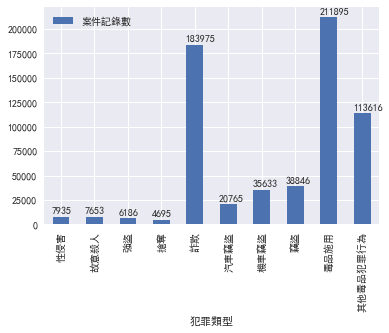

In [93]:
aa = tcc.plot.bar(align="center")
for i in aa.patches:
    aa.text(i.get_x()-0.03, i.get_height()+3000, str(i.get_height()), rotation=0)


Text(0.5,1,'犯罪類型之案件記錄數')

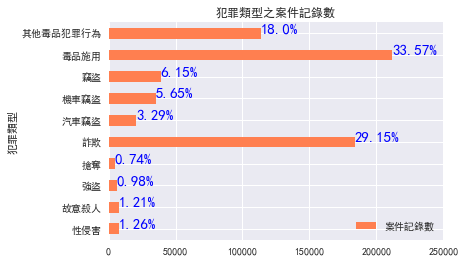

In [91]:
tcc.plot(kind="barh", color="coral", align="center")
total=sum(tcc["案件記錄數"])
for i, v in enumerate(tcc["案件記錄數"]):
    plt.text(v+0.5, i+0.02, str(round(v/total*100,2))+"%", color="blue", fontsize=15)
plt.xlim([0,250000])
plt.legend(loc="lower right")
plt.title("犯罪類型之案件記錄數")

## 重新整理資料，顯示犯罪事件，犯罪記錄次數，及犯罪類型。

例如

"FFFFFFFFA4AD8487",1,['14']

"FFFFFFFFB9873025",3,['14', '14', '14']

"4592FB68",5,['13', '13', '14', '13', '13']

其中"4592FB68"事件的犯罪記錄為5次，包括犯罪類型13及14。

此項分析另開發程式執行，因原始檔案共有63萬多筆資料，故分析耗時。執行為結果儲存於crimeout1.csv檔案。

以下執行讀取crimeout1.csv

In [11]:
df2 = pd.read_csv("data/crimeout1.csv", header=None)

In [12]:
df2.columns=["crime_ID", "counts", "crime_Type"] #更改欄位名稱

In [13]:
df2.head(5)

,crime_ID,counts,crime_Type
0,FFFFFFFFBA677FC9,1,['13']
1,FFFFFFFFD8DB4141,1,['13']
2,FFFFFFFFDB51030D,1,['14']
3,FFFFFFFFA4AD8487,1,['14']
4,FFFFFFFFD7183C0D,1,['13']


## 依據犯罪記錄數欄位分類

In [14]:
cc = df2.groupby('counts') 

In [15]:
crimeRec = cc.size()

## 建立犯罪事件與記錄次數統計表

In [16]:
cgt5 = crimeRec[7:70].sum()
dfy = list(crimeRec[0:5].values)
dfy.append(cgt5)
countDF = pd.DataFrame({"記錄次數":dfy, "次數類別":[1,2,3,4,5,">6"]})
countDF.index=countDF["次數類別"]
del countDF["次數類別"]
countDF.transpose()

次數類別,1,2,3,4,5,>6
記錄次數,414386,40917,12827,5379,2612,3291


## 列出次數類別所有的記錄

以下指令列出包含3筆記錄的所有案件

In [17]:
df2[df2['counts']==3].head()

,crime_ID,counts,crime_Type
82,5F74BB87,3,"['8', '8', '8']"
105,FFFFFFFFA8D5DE31,3,"['8', '8', '8']"
106,FFFFFFFFA8D5DE50,3,"['8', '8', '8']"
107,FFFFFFFFA8D5DE6F,3,"['8', '8', '8']"
110,FFFFFFFFC6520D56,3,"['8', '8', '8']"


# 2.讀入犯罪日期資料

In [18]:
crimedate_df = pd.read_csv("data/occurDate.csv")

## 檔案結構描述

In [19]:
crimedate_df.shape

(650552, 3)

In [20]:
crimedate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650552 entries, 0 to 650551
Data columns (total 3 columns):
id           650552 non-null object
crime_ID     650552 non-null object
occurDate    650552 non-null int64
dtypes: int64(1), object(2)
memory usage: 14.9+ MB


In [21]:
crimedate_df.head(3)

,id,crime_ID,occurDate
0,00001c9f78ac719e20b4a9fbd9364c03,FFFFFFFFBA677FC9,20111020
1,00001c9f78ac719e20b4a9fbd9364c03,FFFFFFFFD8DB4141,20120421
2,000023aaefc5b81b3cd0b0f238f2f235,FFFFFFFFB526830A,20100312


### occurDate 資料檔包含三個欄位，id表示犯罪人編碼，crime_ID 表示犯罪事件編碼及occurDate表示發生日期，共計650551筆資料。

## 資料整理
日期字串格式改為日期格式

In [22]:
crimedate_df["date"]=crimedate_df["occurDate"].astype(str) #原有格式為數值轉換為字串

In [23]:
crimedate_df["date1"]=pd.to_datetime(crimedate_df["date"],format='%Y%m%d', errors="coerce") #將日期字串轉換為日期格式

In [24]:
crimedate_df["date1"].describe()

count                  650301
unique                   2463
top       2010-01-01 00:00:00
freq                      856
first     2009-11-01 00:00:00
last      2016-07-29 00:00:00
Name: date1, dtype: object

### 日期範圍由2009/11/1至2016/7/29，共計650301筆資料，不同日期資料為2463筆，表示日期資料記錄重複，最多重複資料數為856筆，日期為2010/1/1日，重複記錄原因可能是由於每一案件有不圖參與者造成。
note:
   - count=統計每一列非空值有多少個
   - unique=統計每一列唯一非空值出現多少次
   - Top=出現最多的值
   - freq=出現最多值出現的次數

In [25]:
crimedate_df = crimedate_df.drop("date", axis=1) #將不用的欄位刪除

In [26]:
crimedate_df.set_index("date1", inplace=True) #將日期設定為索引

In [27]:
crimedate_df.head()

,id,crime_ID,occurDate
date1,,,
2011-10-20,00001c9f78ac719e20b4a9fbd9364c03,FFFFFFFFBA677FC9,20111020
2012-04-21,00001c9f78ac719e20b4a9fbd9364c03,FFFFFFFFD8DB4141,20120421
2010-03-12,000023aaefc5b81b3cd0b0f238f2f235,FFFFFFFFB526830A,20100312
2010-02-08,00004c2de7c6f4110fc3b0b6676df130,75703FB4,20100208
2013-01-29,0000ab48b06e0bb2cd59f1268fbbebb6,FFFFFFFFDB51030D,20130129


Note:
  - id: 犯罪人編號
  - crime_ID: 犯罪事件編號
  - occurDate: 發生日期
  - date1: 日期格式轉換 for Pandas

## 依日期統計案件記錄數

In [28]:
cc = crimedate_df.groupby( "crime_ID").size()
cc.head()

crime_ID
1-Feb-39    1
1-Feb-58    1
1.00E+07    1
1.00E+10    2
1.00E+85    1
dtype: int64

## 檢查空值

In [29]:
crimedate_df.isnull()["occurDate"].count()

650552

### 表示無空值記錄

## 繪製時間序列圖

In [30]:
dategroup = crimedate_df.groupby("date1")
datedd = dategroup.size()
type(datedd)

pandas.core.series.Series

Text(0,0.5,'案件數量')

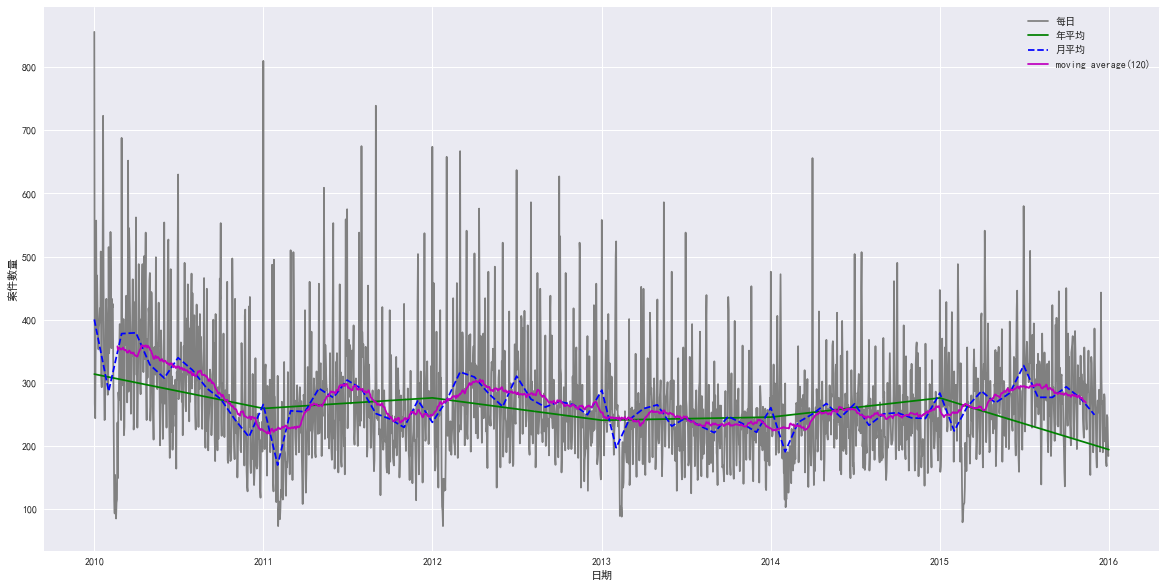

In [31]:
plt.figure(figsize=(20,10))
datedd["2010":"2015"].plot(style="gray")
datedd["2010":"2016"].resample('A').mean().plot(style="g-")
datedd["2010":"2015"].resample("M").mean().plot(style="b--")
datedd["2010":"2015"].rolling(100, center=True).mean().plot(style="m-")
plt.legend(["每日","年平均","月平均","moving average(120)"], loc="upper right")
plt.xlabel("日期")
plt.ylabel("案件數量")

## 案件記錄數統計

In [32]:
crimedate = crimedate_df.groupby("date1").size()
crimeevent = crimedate_df.groupby("crime_ID").size()
crimepp = crimedate_df.groupby("id").size()

In [33]:
crimedate.head() #依日期統計

date1
2009-11-01    469
2009-11-02    393
2009-11-03    358
2009-11-04    360
2009-11-05    428
dtype: int64

In [34]:
crimeevent.head() #依事件統計


crime_ID
1-Feb-39    1
1-Feb-58    1
1.00E+07    1
1.00E+10    2
1.00E+85    1
dtype: int64

In [35]:
crimepp.head() #依犯罪人統計

id
00001c9f78ac719e20b4a9fbd9364c03    2
000023aaefc5b81b3cd0b0f238f2f235    1
00004c2de7c6f4110fc3b0b6676df130    1
0000ab48b06e0bb2cd59f1268fbbebb6    5
0000e4d962feb060f6eede280a0290f2    1
dtype: int64

## 繪製每年的案件記錄數時間序列圖

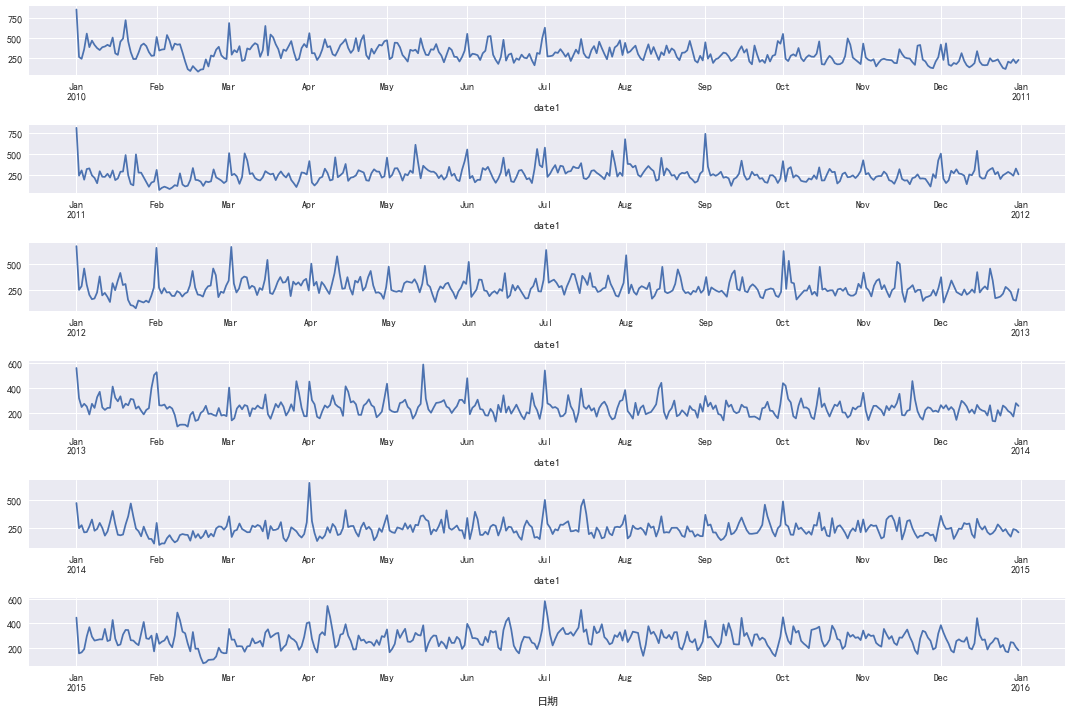

In [36]:
fig, ax = plt.subplots(6, 1, figsize=(15, 10))
crimedate["2010-1-1":"2010-12-31"].plot(ax=ax[0])
crimedate["2011-1-1":"2011-12-31"].plot(ax=ax[1])
crimedate["2012-1-1":"2012-12-31"].plot(ax=ax[2])
crimedate["2013-1-1":"2013-12-31"].plot(ax=ax[3])
crimedate["2014-1-1":"2014-12-31"].plot(ax=ax[4])
crimedate["2015-1-1":"2015-12-31"].plot(ax=ax[5])
plt.xlabel("日期")
plt.tight_layout()

In [37]:
crimedate_df["crime_ID"].nunique() #案件數

484231

In [38]:
crimedate_df["id"].nunique() #犯罪人數

276707

In [39]:
ddcount1=crimedate_df.groupby(["crime_ID", "id"])["crime_ID"].count()
ddcount1.head(10)

crime_ID  id                              
1-Feb-39  62ce98b19b749611899b97fd93c7c0f8    1
1-Feb-58  f396b5a1ab3c882e983a8a8e790c2dc8    1
1.00E+07  aafbe0ed447f32c39ec0d45fd1076725    1
1.00E+10  d5e45896c85f53a148b2afb1f47feff4    1
          f2d40bb8fd292906ff1cbe0a1ac4b67a    1
1.00E+85  10c02411bb1dfd05be295defff1b2fc0    1
1.01E+05  8defd04e59645b740d07bc6d35ffc3a7    1
1.02E+69  ee8de22b970456bd45c47bb379a42f33    1
1.02E+88  ee8de22b970456bd45c47bb379a42f33    1
1.02E+95  db42b415845cac69bc8a0f368b8c63d1    1
Name: crime_ID, dtype: int64

In [40]:
ddcount2=crimedate_df.groupby("crime_ID")["id"].count()
ddcount2.head()

crime_ID
1-Feb-39    1
1-Feb-58    1
1.00E+07    1
1.00E+10    2
1.00E+85    1
Name: id, dtype: int64